In [71]:
import sys
import random
import numpy as np
np.set_printoptions(suppress=True)

# Question 5

In [233]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)


def choose_centroids(data, k):
    centroids = []
    data = data.copy()
    c = np.random.randint(data.shape[0])
    centroids.append((data[c][0], data[0][1]))
    np.delete(data, c)

    k-=1
    for i in range(k):
        probabilities = []
        for j,(x1,y1) in enumerate(data):
            min_dist = distance
            for l,(x2,y2) in enumerate(centroids):
                distance = dist(x1,y1,x2,y2)
                if distance < min_dist:
                    min_dist = distance


def initialize_centroids(X, k):
    # Initialize an empty list to store the centroids
    centroids = []
    
    # Choose the first centroid randomly
    centroids.append(X[np.random.randint(X.shape[0])])
    
    # Initialize an array to store the distances from each point to the closest centroid
    distances = np.zeros(X.shape[0])
    
    for i in range(1, k):
        # Calculate the distances from each point to the closest centroid
        for j, x in enumerate(X):
            distances[j] = np.min([np.linalg.norm(x - c, ord=2) for c in centroids])
            distances[j] = distances[j]**2
            
        # Normalize the distances so they form a probability distribution
        print('Distances:',distances)
        distances /= np.sum(distances)
        print('Probabilities:',distances)
        
        # Choose the next centroid randomly, with probability proportional to the distance
        c = np.random.choice(X.shape[0], p=distances)
        print('Choice:',c)
        centroids.append(X[c])
        
    return centroids


def kmeans(data, k=2, initial='random'):
    # centroids = [(3,8),(7,5),(1,2)]
    if initial == '++':
        centroids = initialize_centroids(data, k)
    else:
        centroids = [(random.randint(1,10), random.randint(1,10)) for i in range(k)]
    centroids = np.array(centroids)


    for i in range(3):
        clusters = [[] for i in range(k)]

        # Find the closest centroids
        for j,(x1,y1) in enumerate(data):
            closest_centroid = 0
            min_dist = sys.maxsize
            for l,(x2,y2) in enumerate(centroids):
                distance = dist(x1,y1,x2,y2)
                if distance < min_dist:
                    min_dist = distance
                    closest_centroid = l
            # print(closest_centroid,j)
            clusters[closest_centroid].append(j)
        
        print(clusters)
        
        print(centroids)
        # Update the centroids
        for l,_ in enumerate(centroids):
            centroids[l] = data[np.ix_(clusters[l], list(range(data.shape[1])))].mean(axis=0)
        old_clusters = clusters
        print(centroids)
    
    return(clusters, centroids)

In [245]:
a = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
kmeans(a, k=3, initial='++')

Distances: [72. 37.  0. 25.  2.  4. 53. 41.]
Probabilities: [0.30769231 0.15811966 0.         0.10683761 0.00854701 0.01709402
 0.22649573 0.17521368]
Choice: 1
Distances: [25.  0.  0. 18.  2.  4. 10. 20.]
Probabilities: [0.3164557  0.         0.         0.2278481  0.02531646 0.05063291
 0.12658228 0.25316456]
Choice: 0
[[2, 4, 5], [1, 6], [0, 3, 7]]
[[ 8  4]
 [ 2  5]
 [ 2 10]]
[[7 4]
 [1 3]
 [3 9]]
[[2, 4, 5], [1, 6], [0, 3, 7]]
[[7 4]
 [1 3]
 [3 9]]
[[7 4]
 [1 3]
 [3 9]]
[[2, 4, 5], [1, 6], [0, 3, 7]]
[[7 4]
 [1 3]
 [3 9]]
[[7 4]
 [1 3]
 [3 9]]


([[2, 4, 5], [1, 6], [0, 3, 7]],
 array([[7, 4],
        [1, 3],
        [3, 9]]))

In [ ]:
np.linalg.norm([1,2])

In [ ]:
a

In [111]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random')
km.fit_predict(a)

array([0, 1, 2, 0, 2, 2, 1, 0])

<AxesSubplot:>

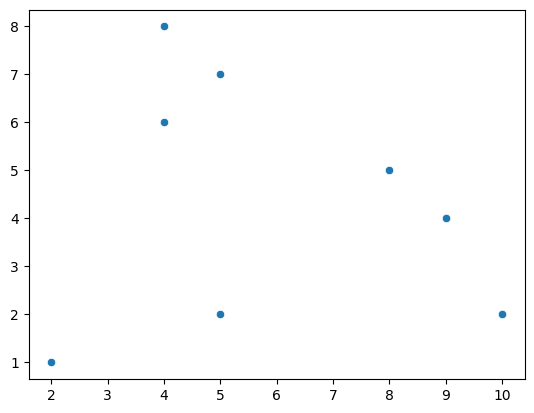

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(y=a[:,0], x=a[:,1])

# Question 1

In [119]:
mat = np.array([[0.7820, 0.7190, 0.5210, 0.6280, 0.8640, 0.5630],
[1.0750, 0.8780, 0.6030, 0.9290, 1.0630, 0.8520],
[1.1250, 0.7250, 0.4340, 1.0860, 0.8930, 1.0280],
[0.6600, 0.7770, 0.6130, 0.4290, 0.9210, 0.3540],
[0.3600, 0.3080, 0.2160, 0.3020, 0.3710, 0.2750],
[1.2270, 0.8830, 0.5680, 1.1300, 1.0790, 1.0560],
[0.5520, 0.3850, 0.2430, 0.5160, 0.4710, 0.4840]])

mat

array([[0.782, 0.719, 0.521, 0.628, 0.864, 0.563],
       [1.075, 0.878, 0.603, 0.929, 1.063, 0.852],
       [1.125, 0.725, 0.434, 1.086, 0.893, 1.028],
       [0.66 , 0.777, 0.613, 0.429, 0.921, 0.354],
       [0.36 , 0.308, 0.216, 0.302, 0.371, 0.275],
       [1.227, 0.883, 0.568, 1.13 , 1.079, 1.056],
       [0.552, 0.385, 0.243, 0.516, 0.471, 0.484]])

In [132]:
np.round(mat@mat.T, 4)

array([[2.8578, 3.7676, 3.6595, 2.6586, 1.2805, 4.1267, 1.8386],
       [3.7676, 5.009 , 4.9416, 3.4405, 1.6969, 5.5333, 2.4704],
       [3.6595, 4.9416, 5.0132, 3.2241, 1.664 , 5.5434, 2.4841],
       [2.6586, 3.4405, 3.2241, 2.5727, 1.1779, 3.6964, 1.6389],
       [1.2805, 1.6969, 1.664 , 1.1779, 0.5756, 1.8683, 0.8335],
       [4.1267, 5.5333, 5.5434, 3.6964, 1.8683, 6.1641, 2.7577],
       [1.8386, 2.4704, 2.4841, 1.6389, 0.8335, 2.7577, 1.2343]])

In [133]:
np.round(mat.T@mat, 4)

array([[5.4082, 4.2414, 2.8573, 4.7747, 5.1483, 4.4082],
       [4.2414, 3.44  , 2.3566, 3.6773, 4.1659, 3.3767],
       [2.8573, 2.3566, 1.6275, 2.4541, 2.8507, 2.2471],
       [4.7747, 3.6773, 2.4541, 4.2552, 4.4694, 3.9394],
       [5.1483, 4.1659, 2.8507, 4.4694, 5.0459, 4.1056],
       [4.4082, 3.3767, 2.2471, 3.9394, 4.1056, 3.65  ]])

In [143]:
u, singular_values, vt = np.linalg.svd(mat)
min_component = min(mat.shape[0], mat.shape[1])
sig = np.zeros((u.shape[0], vt.shape[0]), dtype=float)
sig[:min_component, :min_component] = np.diag(singular_values)
np.round(sig, 4)

array([[4.7958, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.6536, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0009, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.0006, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.0004, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.0003],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [161]:
def rank_r_approx_error(mat, u, sig, vt, r=1):
    res = u[:,:r]@sig[:r,:]@vt
    error = mat - res
    return np.sqrt(np.sum(np.array(error)**2))
    return np.sqrt(np.trace(error.T@error))
    y, s, vete = np.linalg.svd(error)
    return np.sqrt(np.sum(s)**2)


rank_r_approx_error(mat, u, sig, vt, r=1)

0.653592804632103

In [159]:
np.sum(np.array([[1,2],[3,4]])**2)

30

# Question 4

In [134]:
from sklearn.svm import SVC

X,y = np.array([[-1,-1],[-1,1], [1,-1], [1,1]]), np.array([0, 1, 1, 0])

model = SVC(C=1.0, kernel='poly')
model.fit(X,y)

SVC(kernel='poly')

In [142]:
model.support_vectors_

array([[-1., -1.],
       [ 1.,  1.],
       [-1.,  1.],
       [ 1., -1.]])

C:\Users\kishl\AppData\Local\Temp\ipykernel_22064\3085748868.py:36: UserWarning: No contour levels were found within the data range.
  plt.contour(
C:\Users\kishl\AppData\Local\Temp\ipykernel_22064\3085748868.py:36: UserWarning: No contour levels were found within the data range.
  plt.contour(


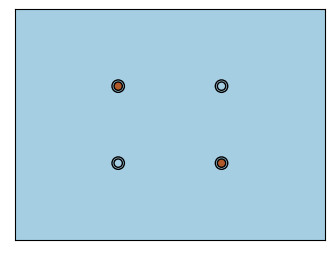

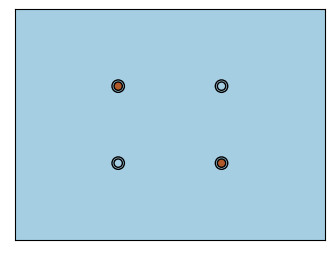

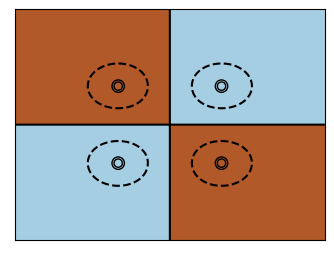

In [141]:
# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf"):
    clf = SVC(kernel=kernel, gamma=2)
    clf.fit(X, y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

# Question 3

In [ ]:
(0, 1, 1) +
(1, 0, 1) +
(1, 1, 0) +
(1, 1, 1) +
(0, −1, −1) –
(−1, −1, 0) –
(−1, 0, −1) –
(−1, −1, 1) 

In [246]:
from sklearn.svm import LinearSVC
X = np.array([[0,1,1],[1,0,1],[1,1,0],[1,1,1],[0,-1,-1],[-1,-1,0],[-1,0,-1],[-1,-1,1]])
Y = np.array([1,1,1,1,0,0,0,0])

clf = LinearSVC()
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_

2/np.linalg.norm(w, ord=2)

2.238715618282263

In [251]:
clf.coef_.dot(X.T) + clf.intercept_

array([[ 0.89230899,  0.89231531,  1.13846826,  1.47692882, -0.95383916,
        -1.19999843, -0.95384549, -0.86153787]])

In [ ]:
# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()